In [84]:
import os
import datetime
import pygrib
import pickle
import numpy as np
import pygrib
import matplotlib.pyplot as plt

def _getting_valid_matrix(series, time):
    # There are two types of matrix, matrix with values or masked matrix, 
    # masked matrix should be filled with -999.0, like no valid data.
    # if it is VIL, then we will fill it with 0.0, 
    # cloudtop, we will fill it with -999.0
    if type(series[time]) == np.ma.core.MaskedArray:
        name = series["name"]
        if name == "VIL":
            retn = series[time].filled(-999.0)
        if name == "cloudtop":
            retn = series[time].filled(0.0)     
    else: 
        retn = series[time]

    return retn

def series_show(series):
    for i in range(12):
        fig, axs = plt.subplots(1,8,figsize=(15,15))
        for j in range(8):
            time = (i*2 + j//4)*100 + j%4*15
            try:
                mat = _getting_valid_matrix(series,time)
                axs[j].imshow(mat)
                axs[j].set_title('{}_{:<4}'.format(series["name"],time))
            except:
                print('\x1b[6;30;41m'+ f"Warning: Not found the data at {time}. Please contact with the author."+'\x1b[0m')
        plt.show()

def generate_VIL_density_matrix(cloudtop,VIL):
    VIL_density = {}
    VIL_density["name"]="VIL_density"
    for i in range(24):
        for j in [0,15,30,45]:
            time = i*100+j
            # Checking
            try:
                #Verifying the shape is correct
                if (VIL[time].shape != (100,100)) or (cloudtop[time].shape != (100,100)):
                    print('\x1b[6;30;41m'+ "Warning: The shape of VIL or cloudtop is wrong!"+'\x1b[0m')
            except:
                print('\x1b[6;30;41m'+ f"Warning: the data of VIL or cloudtop at {time} is lost."\
                      +'\x1b[0m')
            #filling the mask matrix
            cloudtop_mat = _getting_valid_matrix(cloudtop,time)
            VIL_mat = _getting_valid_matrix(VIL,time)
            VIL_density[time]= VIL_mat/cloudtop_mat
    return VIL_density
cur_location = os.getcwd()

Step1: put this notebook under the same folder with "/hrrrdata", and then use the following codes to load the data on a certain day.

In [85]:
with open(cur_location+'/hrrrdata/hrrr2021-03-01.dat','rb') as f:
    (cloudtop, VIL, names) = pickle.load(f)
    # self check
    if len(set(names))!= 2:
        print('\x1b[6;30;41m'+ "Warning: The data is not correct, Because either cloudtop or VIL is lost!"+'\x1b[0m')
    cloudtop["name"] = "cloudtop"
    VIL["name"] = "VIL"

Step2: The VIL_density matrix is defined via the elementwise fractions between matrix VIL and cloudtop.
Using the following code can generate VIL_density dictionary.

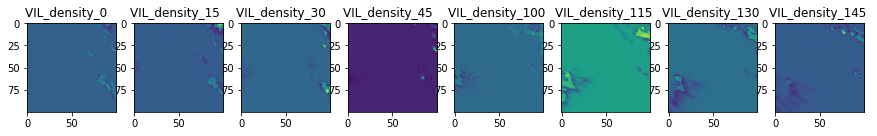

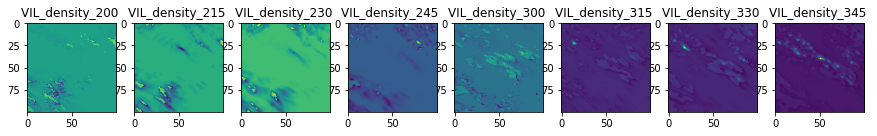

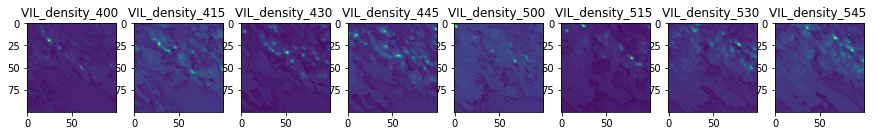

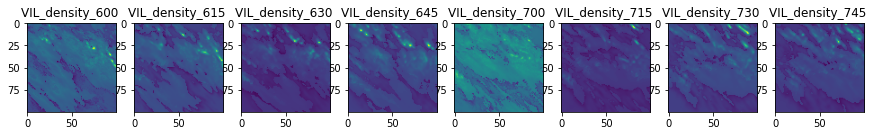

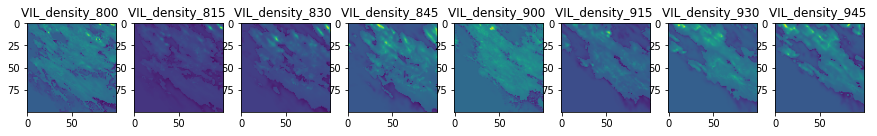

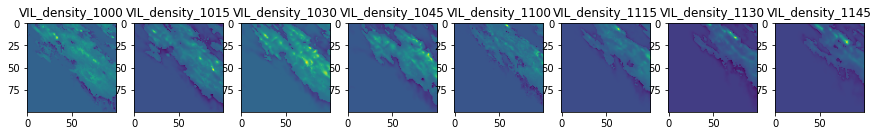

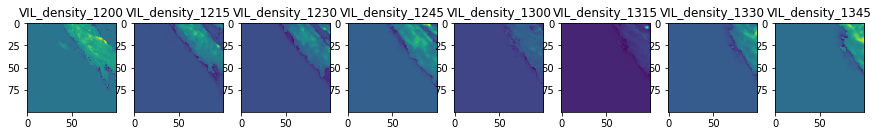

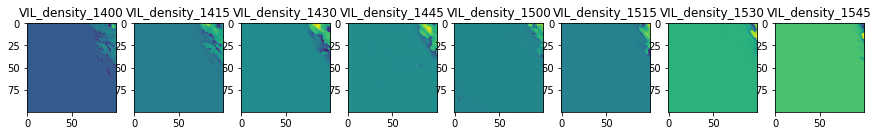

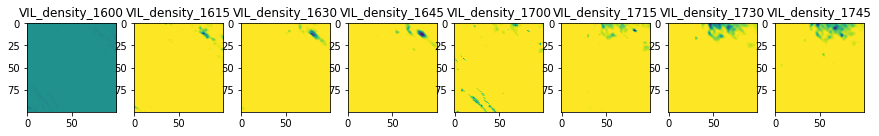

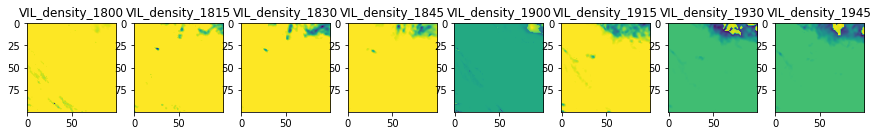

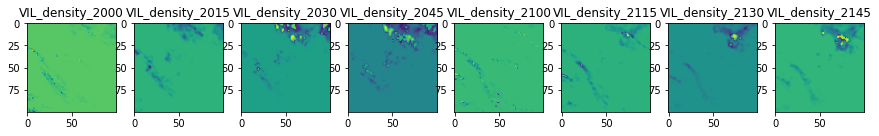

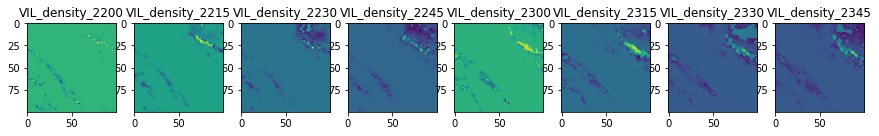

In [87]:
VIL_density = generate_VIL_density_matrix(cloudtop,VIL)
series_show(VIL_density)

Step3: use the function series_show to show the cloudtop or VIL.

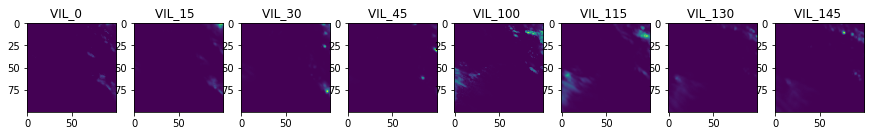

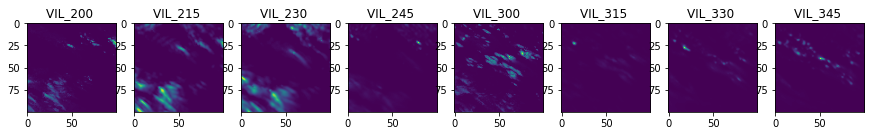

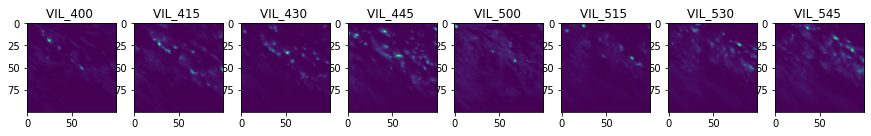

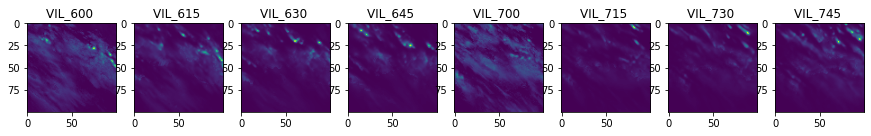

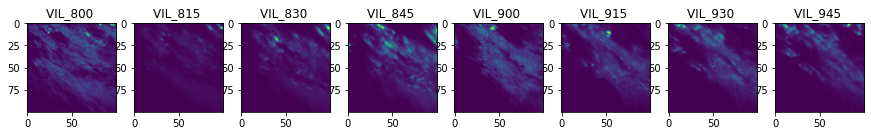

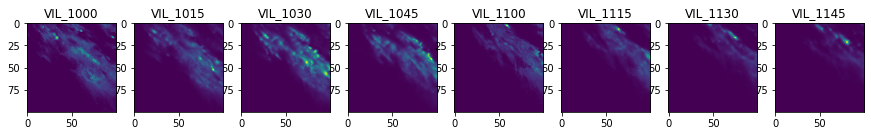

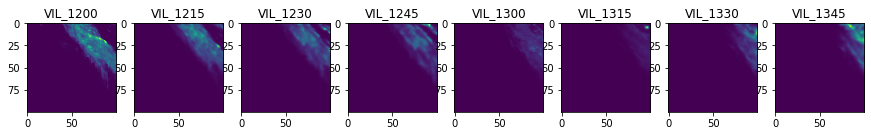

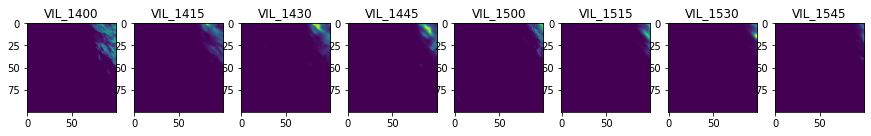

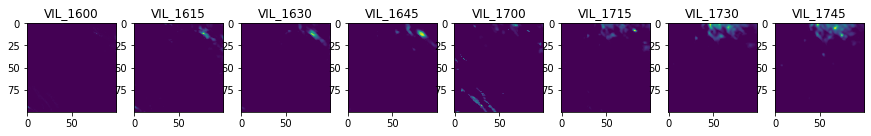

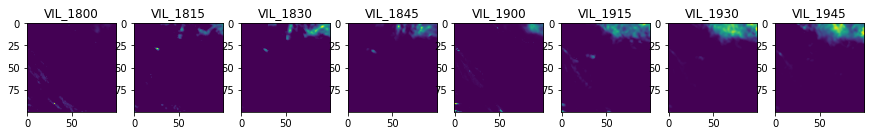

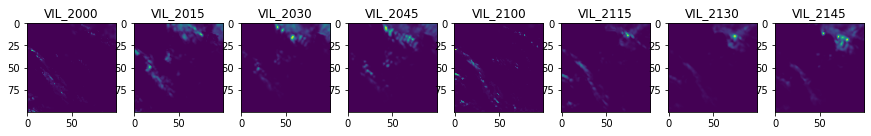

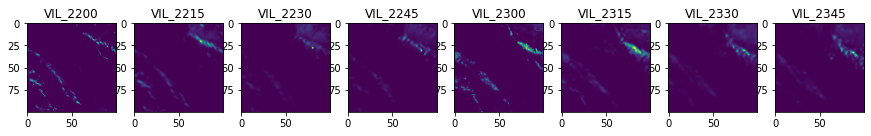

In [88]:
series_show(VIL)

4. If there are some abnormal data, please use names to check.
The correct result should be as follows.

In [89]:
names

['unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integr